# RECIPE - WINE
In this notebook we do EDA on 2 seperate datasets:
    - Wines
    - Recipes
<p>The intent is to link 1 recipe to 1 wine. 
We narrow down the choice by identifying classes for recipes (FoodClasses) and wines (WineClasses) and then link these based on the below image. (See https://winefolly.com/) 


The multiple results in these classes can be narrowed down futher by
- a simple random choice to retrieve 1 recipe and 1 wine.
- ...

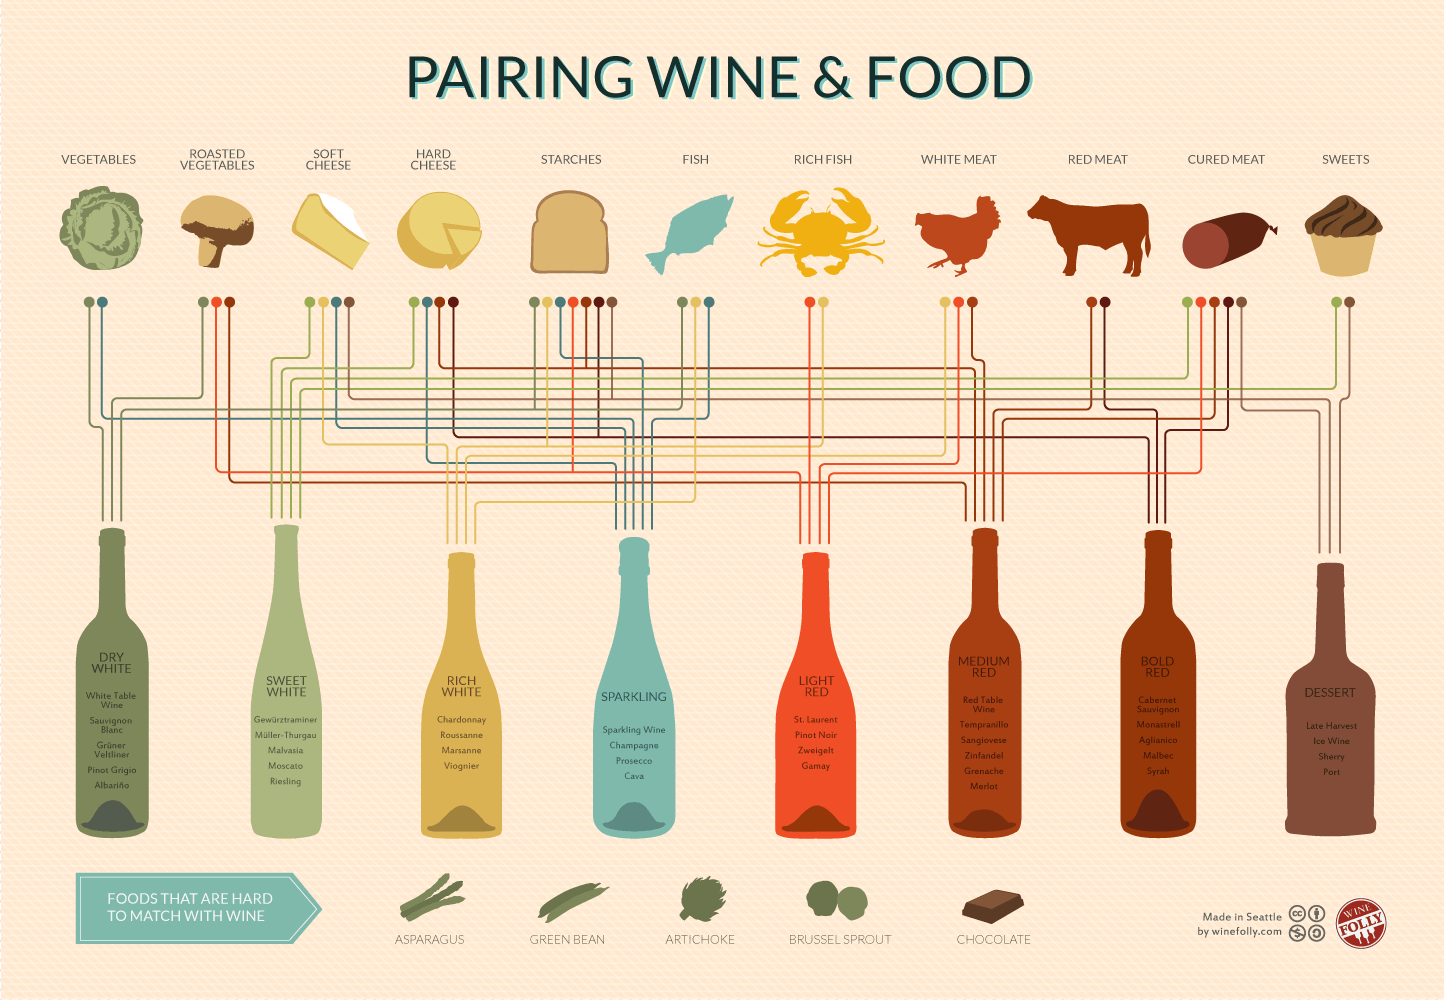

## Modules

In [1]:
import pandas as pd
import numpy as np
import string

#visualisation
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
import pkg_resources
# list packages to be checked
root_packages = ['pandas', 'numpy','matplotlib','string'] #, 'seaborn', 'scikit-learn','numpy','keras','tensorflow']
# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

pandas==1.1.3
numpy==1.19.2
matplotlib==3.3.2


Wineclasses are based on the grape varieties used in the wine. This file is created based on the above image. But you will see that our dataset contains much more varieties then we can see in the image.

In [3]:

dfWineClass = pd.read_csv('wines/wineclasses.txt', encoding='utf_8')
dfWineClass.head()

,wineclass,variety
0,dessert,late harvest
1,dessert,ice wine
2,dessert,sherry
3,dessert,port
4,dry white,white table wine


The foodclasses from the above image are used to setup this basic file, but there are no ingredients in our image. We'll need to add these ourselves, some basic ingredients are added ...


In [4]:
dfFoodClass = pd.read_csv('recipes/foodclasses.txt', encoding='utf_8')
dfFoodClass.head()

,foodclass,food
0,vegetables,carrot
1,vegetables,letuce
2,roasted vegetables,onion
3,roasted vegetables,mushroom
4,soft cheese,brie


Pairings: the link between foodclass and wineclass, again based on the image.

In [5]:
dfPairings = pd.read_csv('pairings/pairings.txt', encoding='utf_8')
dfPairings.head()

,foodclass,wineclass
0,vegetables,dry white
1,vegetables,sparkling
2,roasted vegetables,dry white
3,roasted vegetables,light red
4,roasted vegetables,medium red


# EDA wines

Some files from https://www.kaggle.com/zynicide/wine-reviews were inspected, but we opted to use the 130k-v2 in json format.

In [6]:
dfWine = pd.read_json('wines/winemag-data-130k-v2.json', encoding='utf_8')
dfWine.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [7]:
dfWine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [8]:
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   points                 129971 non-null  int64  
 1   title                  129971 non-null  object 
 2   description            129971 non-null  object 
 3   taster_name            103727 non-null  object 
 4   taster_twitter_handle  98758 non-null   object 
 5   price                  120975 non-null  float64
 6   designation            92506 non-null   object 
 7   variety                129970 non-null  object 
 8   region_1               108724 non-null  object 
 9   region_2               50511 non-null   object 
 10  province               129908 non-null  object 
 11  country                129908 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [9]:
# drop wines without variety info.
dfWine.dropna(how='any', axis=0, subset=['variety'], inplace = True)
dfWine.reset_index(drop=True, inplace=True)

In [10]:
dfWine['title'].value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                             11
Korbel NV Brut Sparkling (California)                                               9
Segura Viudas NV Extra Dry Sparkling (Cava)                                         8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                                7
Ruinart NV Brut Rosé  (Champagne)                                                   7
                                                                                   ..
Weixelbaum 2012 Alte Reben Reserve Grüner Veltliner (Kamptal)                       1
Ministry of the Vinterior 2009 The Messenger Old Vine Zinfandel (Amador County)     1
Longplay 2012 Lia's Vineyard Jory Bench Reserve Pinot Noir (Chehalem Mountains)     1
Rocca delle Macìe 2011 Occhio a Vento Vermentino (Maremma)                          1
Bischöfliche Weingüter Trier 2011 Scharzhoferger Spätlese Riesling (Mosel)          1
Name: title, Length: 118839, dtype: int64

- 118.840 unique wines, some have multple reviews

In [11]:
dfWine['variety'].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Espadeiro                       1
Piquepoul Blanc                 1
Molinara                        1
Biancolella                     1
Riesling-Chardonnay             1
Name: variety, Length: 707, dtype: int64

- 707 different grape varieties in the dataset, but this needs to be cleaned up since in real life there are 583 grape varieties.

In [12]:
#variety column cleaning; possibly multiple varieties are given for 1 wine; we also see 'blend' a lot
dfWine['variety_list'] = dfWine['variety'].str.replace('-style', '_style').str.replace(',','-').str.lower()
dfWine['variety_list'] = dfWine['variety_list'].str.split('-') #convert the string into a list

In [13]:
# determine the corresponding wineClasses for varieties
def getWineClass(variety):
    tmpClass = list(dfWineClass['wineclass'][dfWineClass['variety'].isin(variety)])
    if tmpClass:
        #convert to set to distinct values, sort them to make sure combinations are unique
        return sorted(list(set(tmpClass))) 
    else:
        return None

dfWine['wineclass_list'] = dfWine['variety_list'].apply(lambda x: getWineClass(x))

In [14]:
# list the already assigned wineclasses
pd.set_option('display.max_rows', 30)  
dfWine['wineclass_list'].value_counts() 
# we get an exception on the usage of lists here -  can be ignored/introspection only

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[bold red]                            17375
[light red]                           14617
[rich white]                          13230
[medium red]                          11166
[dry white]                            6658
[sweet white]                          6614
[dessert]                               768
[bold red, medium red]                  473
[sparkling]                             236
[bold red, rich white]                   18
[dry white, rich white]                  16
[rich white, sweet white]                 4
[bold red, light red]                     3
[bold red, medium red, rich white]        1
Name: wineclass_list, dtype: int64

- there are now 561 unique varieties in our dataset ; in real life there are 583 grape varieties, so the varieties can be considered valid 
- only 71K wineclasses filled with base dataset (which contains only 38 classed varieties); we need to annotate wineclasses based on 'expert knowledge' => internet lookups ...

In [15]:
# list the remaining unclasses varieties to anotate them
pd.set_option('display.max_rows', None)  
dfWine['variety_list'][dfWine['wineclass_list'].isna()].value_counts()
# we get an exception on the usage of lists here -  can be ignored/introspection only

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[red blend]                          8946
[bordeaux_style red blend]           6915
[rosé]                               3564
[nebbiolo]                           2804
[portuguese red]                     2466
[white blend]                        2360
[sparkling blend]                    2153
[rhône_style red blend]              1471
[pinot gris]                         1455
[champagne blend]                    1396
[cabernet franc]                     1353
[grüner veltliner]                   1345
[portuguese white]                   1159
[bordeaux_style white blend]         1066
[shiraz]                              836
[petite sirah]                        770
[sangiovese grosso]                   751
[barbera]                             721
[glera]                               709
[corvina,  rondinella,  molinara]     619
[chenin blanc]                        591
[tempranillo blend]                   588
[carmenère]                           575
[pinot blanc]                     

In [16]:
#created a second file with wine classifications, including the internet findings; the expert has done his job ;)
dfWineClass = pd.read_csv('wines/wineclasses_filled.txt', encoding='utf_8')
dfWineClass.head()

,wineclass,variety
0,dessert,late harvest
1,dessert,ice wine
2,dessert,sherry
3,dessert,port
4,dry white,white table wine


In [17]:
dfWine['wineclass_list'] = dfWine['variety_list'].apply(lambda x: getWineClass(x))

In [18]:
pd.set_option('display.max_rows', 30)  
dfWine['wineclass_list'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[medium red]                          32679
[bold red]                            24909
[light red]                           18829
[rich white]                          15919
[dry white]                           12870
[sweet white]                          6626
[sparkling]                            4559
[dessert]                               768
[bold red, medium red]                  635
[dry white, rich white]                  73
[bold red, rich white]                   57
[rich white, sweet white]                 4
[bold red, light red]                     3
[bold red, medium red, rich white]        1
[dry white, sweet white]                  1
[dry white, light red]                    1
Name: wineclass_list, dtype: int64

- after filling wineClass for top30 missing wine varieties the class assignment goes up from to 71K to 118K
- we get some class combinations between white and red wine ... (varietes mainly contain grapes, some grapes are used for both red and white wines)


In [19]:
## OPTIONAL
# optionally list the remaining unclasses varieties to anotate even more
#pd.set_option('display.max_rows', None)  
#dfWine3['variety_list'][dfWine3['wineclass_list'].isna()].value_counts()


# EDA recipes

In [39]:
#source = https://eightportions.com/datasets/Recipes/
#another usecase on this dataset: 
#recipe generation: https://colab.research.google.com/drive/1cAw6Ru9kQ6kZRM62cnnZTJsbBzxix6Oo#scrollTo=SwXRR8FJzoC5
#alternative implementation with this dataset: https://github.com/schmidtdominik/RecipeNet

dfRecipeAR = pd.read_json('recipes/recipes_raw_nosource_ar.json', encoding='utf_8', orient='index')
#dfRecipeAR.head()

In [40]:
dfRecipeAR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39522 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         39522 non-null  object
 1   ingredients   39522 non-null  object
 2   instructions  39522 non-null  object
 3   picture_link  39522 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [41]:
dfRecipeEPI = pd.read_json('recipes/recipes_raw_nosource_epi.json', encoding='utf_8', orient='index')
#dfRecipeEPI.head()

In [42]:
dfRecipeEPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25323 entries, 05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby to qznqHiNpq0AB1AYn002A2HvaEFnN0lq
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ingredients   25323 non-null  object
 1   picture_link  12119 non-null  object
 2   instructions  25323 non-null  object
 3   title         25323 non-null  object
dtypes: object(4)
memory usage: 989.2+ KB


In [43]:
dfRecipeFN = pd.read_json('recipes/recipes_raw_nosource_fn.json', encoding='utf_8', orient='index')
#dfRecipeFN.head()

In [44]:
dfRecipeFN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59802 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   instructions  59628 non-null  object
 1   ingredients   59802 non-null  object
 2   title         59750 non-null  object
 3   picture_link  30952 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [45]:
# drop some recipes without a title
dfRecipeFN = dfRecipeFN.dropna(axis=0, subset=['title'])

In [46]:
dfRecipeFN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59750 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   instructions  59628 non-null  object
 1   ingredients   59750 non-null  object
 2   title         59750 non-null  object
 3   picture_link  30952 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [47]:
dfRecipeALL =pd.concat([dfRecipeAR, dfRecipeEPI,dfRecipeFN ])

In [48]:
dfRecipeALL.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [49]:
dfRecipeALL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124595 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124595 non-null  object
 1   ingredients   124595 non-null  object
 2   instructions  124473 non-null  object
 3   picture_link  82593 non-null   object
dtypes: object(4)
memory usage: 4.8+ MB


In [50]:
pd.set_option('display.max_colwidth', None)  
dfRecipeALL['ingredients']

rmK12Uau.ntP510KeImX506H6Mr6jTu                                                                                                                                                                                                                                                                                                                                                                                                                                             [4 skinless, boneless chicken breast halves ADVERTISEMENT, 2 tablespoons butter ADVERTISEMENT, 2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT, 1 onion, finely diced ADVERTISEMENT, 2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT, ADVERTISEMENT]
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm                                                                                                                                                                                                                    

In [51]:
#dfRecipeALL['ingredients'].count()
dfRecipeALL['ingredients_count'] = dfRecipeALL['ingredients'].apply(lambda ttl: len(ttl) -1 )


In [52]:
dfRecipeALL['ingredients_count'].sum()

1192355

We have about 1.2M recipe lines with various structure and content. Our fridge contains a set of ingredients and we would like to find a recipe that has this ingredient in it. Even more, it should be the main ingredient(s) for our recipe.

### Feature engineering 

- Main ingredients are used in title of the dish and/or can be calculated based on the weights/volumes in the recipent list
- calculating proportions based on the weight is not easy
- we have listings like:
  - "3 eggs ADVERTISEMENT", => we don't know the specific weight of an egg
  - "1 cup vegetable oil ADVERTISEMENT", => OK
  - "2 1/4 cups white sugar ADVERTISEMENT", => extra calculation; OK
  - "1 (15.4 ounce) can pumpkin puree ADVERTISEMENT", => the value between brackets is more indicative; complex but OK
  - "salt and ground black pepper to taste ADVERTISEMENT", => no good indication
  - "MIX TOGETHER: ADVERTISEMENT", => instruction; not an ingredient
  - "1 1/2 cups warm water (110 degrees F/45 degrees C) ADVERTISEMENT" => aargh


1. stem the ingredient texts + title (remove plurals etc) 
2. cleanup edge cases
3. calculate weight based amounts and units 
4. cross-check title with ingredient list
5. sort ingredients based on weight (remeber the issue with actuals weights VS amounts)
6. resort based on cross-check => this aught to be more indicative
7. add classifications for unique top X ingredients for every recipe ; rest = class 'other'
=> AI to the aid ?
8. 


In [53]:
#token functions
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

# tried the below stemmers as well, but no real improvement for our case
#from nltk.stem import SnowballStemmer, WordNetLemmatizer
#snowball = SnowballStemmer('english')
#lemma = WordNetLemmatizer()

#english stopwords
stop_words = set(stopwords.words('english')) 
#custom stopwords for our case
stop_words.add('ADVERTISEMENT')

#punctuation but keep /.-
str_punct = string.punctuation.replace('/','').replace('.','').replace('-','')
punct_trans = str.maketrans('', '', str_punct)


#tokenizer
REtokenizer = RegexpTokenizer(r'\w+\/\(\)')

#stemmer/lemmer
porter = PorterStemmer()

#amount calculation
units ={'cup':240,
        'tablespoon':15,
        'teaspoon':5,
        'pint':480,
        'gallon':3800,
        'ounce':28,       
        'ounc':28,       # the stemmed version 
        'pound':454,        
        'pinch':1}

def isFloat(num):
    try:
        res = float(num) #raises an error for all non
        return res
    
    except ValueError:    
        return False

def getAmount(amount):
    """
     returns a list
       first element = value extracted from amount / if the passed amount is non-numeric; 1 is returned
       second element = 1 if the value is calculated, 2 if the value us retrieved from the units
    """    
    res = isFloat(amount) #raises an error for all non
    if res:
        return [res,1]
    else:
        tmp = amount.split('/')        
        if len(tmp) == 2:
            tel = isFloat(tmp[0]) 
            noem = isFloat(tmp[1]) 
            
            if noem == 0 :
                if tel:
                    return [tel,1]
                else:
                    return [1,1]
            else:

                if (noem + tel):
                    return [tel / noem, 1]
                else:
                    return [1,1] # a
        else:
            val = units.get(amount)
            if val:
                return [val,2]
            else:
                if amount == 'water':
                    return [0,0] 
                    #we don't water as to be included as an ingredient, since it will top out in some recipes
                    #when used for boiling vegetables for instance
                    
                else:
                    return [1,1] #everything not recognized = 1 since we will multiple all values
        
        
def cleanText(txtToClean, stem_yn = True, join_yn = False):    
    #remove all before the "(" if the "(" is somewhere in the beginning; else just remove the bracket
    firstbracket = txtToClean.find('(')
    if firstbracket <= 10:
        txtToClean = txtToClean[firstbracket+1:] 
#    else:
#        txtToClean = txtToClean.replace('(','')
#        
#    txtToClean = txtToClean.replace(')','').replace(',','')
    
    # make 1 word of the common string "(110 degrees F/45 degrees C)" => "(110degreesF/45degreesC)"    
    txtToClean = txtToClean.replace(' degrees ','degrees')
    
    if stem_yn:
    #omit stopwords, stem and tokenize
        words = [porter.stem(word) for word in word_tokenize(txtToClean) if not word in stop_words]    
    else:
        words = [word for word in word_tokenize(txtToClean) if not word in stop_words]    
    
    #remove punctuations and avoid empty strings 
    words = [wcleaned for w in words if len(wcleaned := w.translate(punct_trans) ) > 0]    
    
    if join_yn:
        words = ' '.join([word for word in words])     

    if len(words) == 0:
        return  ''
    else:
        return words    

#    if len(words) == 0:
#        return  []
#    else:
#        return words    
    #if len(words) > 0:
    #    return words    


def weighIngredients(ingredToWeigh):            
    if not ingredToWeigh:
        return [0,False]
    elif len(ingredToWeigh) == 0:
        return [0,False]
    else:
        amounts = [getAmount(word) for word in ingredToWeigh]    

        #print(amounts)   
        
        # the product of all terms indicates 
        # the amount in the first element
        # an indication if we have a weight in the second element  
        # we found a weight unit in the string and we applied it        
        val = [np.prod(x) for x in zip(*amounts)] 

        # if we found multiple units then our calculation is not OK, the second param is non-boolean then
        # too check if we need to elaborate
        if val[1] == 2:
            val[1] = True
        elif val[1] == 1:
            val[1] = False

        return val

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))


def tops(ttl, wgt):
    points = []

    for ttl, weight in zip(ttl,wgt):
        # trying to given some importance to the ingredients
        tot = 0
        # each title - ingredient match = 100K points
        tot = len(ttl) * 100000    
        if weight[1]:
            #the weight calculated on units = 10 points/gram
            tot += weight[0] * 10
        else:
            #the pieces = 100 points/piece
            tot += weight[0] * 100 
        points.append(tot)
    return points

def getMain(top_points,top_amt):
    return  np.flipud(np.argsort(top_points)[-1 * top_amt:])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
# all OK !! +- 7 min 
# clean the title and the ingredients and produce tokenized versions (lists)
dfRecipeALL['title_tokens'] = dfRecipeALL['title'].apply(lambda ttl: cleanText(ttl))
dfRecipeALL['ingredients_tokens'] = dfRecipeALL['ingredients'].apply(lambda ttl: [cleanText(ingr) for ingr in ttl])
# clean, unstemmed version of the ingredients
dfRecipeALL['ingredients_cleaned'] = dfRecipeALL['ingredients'].apply(lambda ttl: [cleanText(ingr, stem_yn=False, join_yn=True) for ingr in ttl])



In [57]:
# title words also found in the ingredients
dfRecipeALL['title_ingredient'] = dfRecipeALL.apply(lambda row: [intersection(row['title_tokens'], ingr) for ingr in row['ingredients_tokens'] ],axis=1)
# determine the weight(grams) or the amount of pieces for each ingredient
dfRecipeALL['ingredient_weights'] = dfRecipeALL['ingredients_tokens'].apply(lambda ttl: [weighIngredients(ingr) for ingr in ttl])
#score each ingredient line based on the weight, amount of pieces AND if it is found in the title.
dfRecipeALL['ingredient_points'] = dfRecipeALL.apply(lambda row: tops(row['title_ingredient'], row['ingredient_weights']),axis=1)



## NER based on ground thruth in redacted secondary dataset

We got a list of about 3500 identified ingredients from the below reference. These were distilled out of the same dataset
as the one we are using. (see recipes/ground_truth_ingredients.txt) We manually redacted this list to about 3000 ingredients so that it fits our needs better.

In [58]:
# original dataset: https://dominikschmidt.xyz/simplified-recipes-1M/#download

#with np.load('simplified-recipes-1M.npz', allow_pickle=True) as data:
#    #recipes = data['recipes']
#    clean_ingredients = data['ingredients'] #3500 ingredients
#np.savetxt('ground_truth_ingredients.txt',clean_ingredients, fmt=('%s'))

In [59]:
# our own redacted ingredient list
clean_ingredients = np.loadtxt('recipes/clean_ingredients.txt',dtype=np.str,delimiter="\n")
#pd.set_option('display.max_rows', 30)  

In [60]:
clean_ingredients

array(['1% low-fat milk', 'absinthe', 'accent', ..., 'zinfandel', 'ziti',
       'zucchini'], dtype='<U39')

In [61]:
def match_ingredient(ingr_to_check, getone = False):
    """
    there could be multiple matches: e.g.
     ['shrimp'],
     ['pepper', 'salt', 'salt pepper'],
     ['cayenne', 'cayenne pepper', 'pepper'],
     ['oil', 'olive', 'olive oil'],
     ['okra'],
     ['paste', 'tomato', 'tomato paste'],
     ['tomato'],
     ['onion'],
     ['clove', 'garlic', 'garlic minced'],
     ['celery'],
     ['bell pepper', 'green bell pepper', 'pepper'],
     ['water'],
     ['green onion', 'onion'],

     => the ingredient with the most spaces is presumably the most indicative
     => more than 1 ingredient without spaces; then we cannot choose at this point, will be arbitrary selection
    """
    if ingr_to_check is not None:
        #match the ingredient string from the recipe with the ground truth
        #we assume that 1 ingredient string describes only 1 ingredient (this is true is most cases)
        #we sometimes see "add salt and pepper to taste" => "salt pepper" is added to ground truth as being 1 ingredient
        ingr_found = [cl_ingr for cl_ingr in clean_ingredients if ingr_to_check.find(cl_ingr) != -1  ]
        
        if getone:
            #determine the amount of spaces (see above) and pick the matched ingredient with the most spaces
                       
            ingr_space_count = [found.count(' ') for found in ingr_found]
            if len(ingr_space_count) > 0:
                best_ingr_found = ingr_found[np.argmax(ingr_space_count)]
            else:
                best_ingr_found = ''

            return best_ingr_found
        else:
            return ingr_found
            

In [62]:
# get the full list of all ingredients found in the ground thruth list
dfRecipeALL['ingredient_match_all'] = dfRecipeALL['ingredients_cleaned'].apply(lambda ttl: [match_ingredient(ingr) for ingr in ttl])

In [63]:
# get the best ingredient found in the ground thruth list
dfRecipeALL['ingredient_match'] = dfRecipeALL['ingredients_cleaned'].apply(lambda ttl: [match_ingredient(ingr, True) for ingr in ttl])

In [64]:
# Determine a top X ingredients per recipe
TOP_AMOUNT = 1
# get the indices of the X top ingredients based on our own POINT calculation
dfRecipeALL['ingredient_top_indx'] = dfRecipeALL['ingredient_points'].apply(lambda pnts: getMain(pnts,TOP_AMOUNT) )
#subselect the top X ingredients
dfRecipeALL['ingredient_top'] = dfRecipeALL.apply(lambda row: [row['ingredients_tokens'][i] for i in row['ingredient_top_indx']],axis=1)
#subselect the title matches for the top X ingredients
dfRecipeALL['title_top'] = dfRecipeALL.apply(lambda row: [row['title_ingredient'][i] for i in row['ingredient_top_indx']],axis=1)

In [65]:
#FINAL COMBO: subselect the top X ingredients (based on our POINTS), matched with the ground thruth
dfRecipeALL['ingredient_top_match'] = dfRecipeALL.apply(lambda row: [row['ingredient_match'][i] for i in row['ingredient_top_indx']],axis=1)

In [66]:
#save engineered features
dfRecipeALL.to_json('recipe/recipe_top_match.json')

#### Recipe data analysis

In [68]:
def evaluate_result(res_lst):
    res_lst = res_lst.explode().explode()
    
    plt.figure(figsize=(5,5))
    print("Ingredients matched set-size ")
    res_lst.groupby(level=0).count().value_counts().plot(kind = 'pie')
    plt.show()
    
    empt = res_lst[res_lst.isna()].fillna(1).groupby(level=0, dropna=False).count().value_counts()#.plot(kind = 'pie')
    print('\nEmpty values in sets:')
    print(str(empt))
    print('\ntop 50 ingredients: ')
    pd.set_option('display.max_rows', 100)  
    print(res_lst.value_counts(dropna=False)[:50])
    

Ingredients matched set-size 


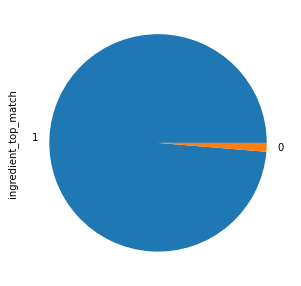


Empty values in sets:
1    1624
Name: ingredient_top_match, dtype: int64

top 50 ingredients: 
                                  6992
flour                             2412
cheese                            1852
NaN                               1624
chicken                           1524
apple                             1322
shrimp                            1280
egg                               1139
potato                            1114
sweet potato                       988
tomato                             888
ground beef                        875
butter                             834
strawberries                       788
chicken broth                      742
milk                               708
boneless chicken breast halves     707
carrot                             662
green beans                        638
heavy cream                        634
corn                               633
banana                             589
sugar                              584
pecan  

In [69]:
evaluate_result( dfRecipeALL['ingredient_top_match'])

Ingredients matched set-size 


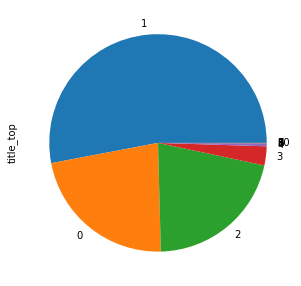


Empty values in sets:
1    27947
Name: title_top, dtype: int64

top 50 ingredients: 
NaN           27947
chicken        5627
potato         3276
chocol         2722
chees          2671
bean           2170
pork           2031
cream          2026
tomato         1716
green          1649
rice           1493
shrimp         1467
red            1461
beef           1384
butter         1342
appl           1334
turkey         1211
sauc           1146
sweet          1131
pepper         1064
steak          1032
mushroom       1025
peanut          999
corn            997
cake            971
salmon          968
pumpkin         911
roast           902
chop            898
lemon           854
onion           850
strawberri      843
egg             807
white           806
lamb            771
squash          770
black           747
cherri          692
orang           682
sausag          675
pasta           653
coconut         650
spinach         644
carrot          642
pea             641
cranberri     

In [70]:
evaluate_result( dfRecipeALL['title_top'])

Ingredients matched set-size 


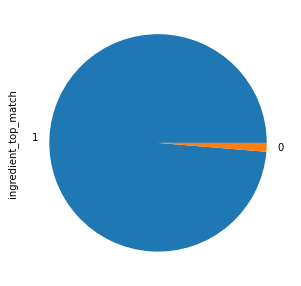


Empty values in sets:
1    1624
Name: ingredient_top_match, dtype: int64

top 50 ingredients: 
                                  6992
flour                             2412
cheese                            1852
NaN                               1624
chicken                           1524
apple                             1322
shrimp                            1280
egg                               1139
potato                            1114
sweet potato                       988
tomato                             888
ground beef                        875
butter                             834
strawberries                       788
chicken broth                      742
milk                               708
boneless chicken breast halves     707
carrot                             662
green beans                        638
heavy cream                        634
corn                               633
banana                             589
sugar                              584
pecan  

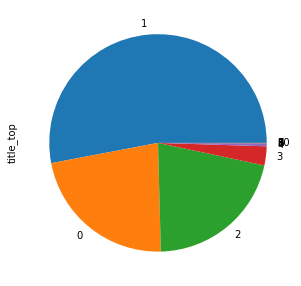


Empty values in sets:
1    27947
Name: title_top, dtype: int64

top 50 ingredients: 
NaN           27947
chicken        5627
potato         3276
chocol         2722
chees          2671
bean           2170
pork           2031
cream          2026
tomato         1716
green          1649
rice           1493
shrimp         1467
red            1461
beef           1384
butter         1342
appl           1334
turkey         1211
sauc           1146
sweet          1131
pepper         1064
steak          1032
mushroom       1025
peanut          999
corn            997
cake            971
salmon          968
pumpkin         911
roast           902
chop            898
lemon           854
onion           850
strawberri      843
egg             807
white           806
lamb            771
squash          770
black           747
cherri          692
orang           682
sausag          675
pasta           653
coconut         650
spinach         644
carrot          642
pea             641
cranberri     

In [71]:
evaluate_result( dfRecipeALL['ingredient_top_match'])
evaluate_result( dfRecipeALL['title_top'])

In [72]:
# generate error to stop noteboook when rerunning notebook 
#the below sections are tests
stop = 1 /0

ZeroDivisionError: division by zero

In [67]:
#THE REST IS WORK / TEST / OPTIONS / ETC
######################################################
#######################################################
#######################################################
#######################################################
#######################################################

## Alternative NER 
### NER with BERT or spacy
- BERT: https://colab.research.google.com/drive/1WR_oyBMTPyElY77Pe_p86Zbp7gnvzz2p
- spacy: https://colab.research.google.com/drive/1Io_I35mi9r3I54o-5YGBK8LLIiotfZqI

### Azure NER

In [ ]:
az_endpoint = "https://aicook-ingredient-ner-trail.cognitiveservices.azure.com/"
az_key =  "-"
#https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/concepts/data-limits?tabs=version-2
# standard tier: 
#v2 1000 docs per request ; per 1min ; price = 1$/1000 
#v3 5 docs per request
# detects PRODUCTS (various kinds - no specifics for food)    
    
# we have 124.595 recipies with 1.192.355 ingredient strings (-124595 * "ADVERTISEMENT")
#if we only only the top 2 => +- 250K 
# ==> 250$ ....

In [ ]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

def authenticate_client():
    ta_credential = AzureKeyCredential(az_key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=az_endpoint, 
            credential=ta_credential)
    return text_analytics_client

MSAclient = authenticate_client()

In [ ]:
key = 'lYrgWNn00EXblOupzM3tL0jGr9O0CB2'   
key = 'XCrj.e1N2h/3g0PEdYrWwu0XvUmEdD6'
tmp_ttl = dfRecipeALL['title'][key]
tmp_ing = dfRecipeALL['ingredients'][key]

print(tmp_ttl)
print(tmp_ing)

In [ ]:
tmp_ing[:5] # free tier ; max 5 docs per request

In [ ]:
docs = tmp_ing[:5]
MSAclient.recognize_entities(documents = docs)

## testing functions

In [ ]:
def cleanIngredient(txtToClean):
    lst = cleanText(txtToClean)
    weigths = weighIngredients(lst)
    print('---------------')
    print(txtToClean)
    print(lst)
    print(weigths)
    

def cleanTitle(txtToClean):
    print('---------------')
    print(txtToClean)
    print(cleanText(txtToClean))

In [ ]:
cleanText('cleaning : .punctuations; /',)

In [ ]:
cleanText('cleaning : .punctuations; /',stem_yn=False)

In [ ]:
cleanText('cleaning : .punctuations; /',stem_yn=False,join_yn= True)

In [ ]:
cleanIngredient("cleaning : .punctuations; /")

In [ ]:
cleanIngredient('cup tablespoon teaspoon pint gallon ounce pound pinch')
cleanTitle('Slow Cooker Chicken and Dumplings')
cleanIngredient("ADVERTISEMENT")
cleanIngredient("3 eggs ADVERTISEMENT")
cleanIngredient("1 cup vegetable oil ADVERTISEMENT")
cleanIngredient("2 1/4 cups white sugar ADVERTISEMENT")
cleanIngredient("1 (15.4 ounce) can pumpkin puree ADVERTISEMENT")
cleanIngredient("salt and ground black pepper to taste ADVERTISEMENT")
cleanIngredient("MIX TOGETHER: ADVERTISEMENT")
cleanIngredient("1 1/2 cups warm water (110 degrees F/45 degrees C) ADVERTISEMENT")
cleanIngredient("cleaning : .punctuations; /")

In [ ]:
dfRecipeALL

In [ ]:
key = 'lYrgWNn00EXblOupzM3tL0jGr9O0CB2'   
key = 'XCrj.e1N2h/3g0PEdYrWwu0XvUmEdD6'
tmp_ttl = dfRecipeAR['title'][key]
tmp_ing = dfRecipeAR['ingredients'][key]

print(tmp_ttl)
print(tmp_ing)


In [ ]:
ttt_list = cleanText(tmp_ttl)


#l = [y for x in [1,2,3,4] if (y := f(x)) is not None]
#ing_list = [ingr_lst for ingr in tmp_ing if (ingr_lst := cleanText(ingr)) is not None]
ing_list = [ cleanText(ingr) for ingr in tmp_ing]

print(ttt_list)
print(ing_list)


In [ ]:
print(ing_list)
print('--------------------')
print(ing_list[[2,4]])

In [ ]:
ttl_ing_int = [intersection(ttt_list,ingr) for ingr in ing_list]

print(ttl_ing_int)


In [ ]:
ing_weight = [weighIngredients(ingr) for ingr in ing_list]

print(ing_weight)

In [ ]:
pnts = tops(ttl_ing_int,ing_weight)
print(pnts)

# retrieve the 2 main ingredients
top_idx = getMain(pnts)

top_ingr = [ing_list[i] for i in top_idx]
top_title = [ttl_ing_int[i] for i in top_idx]


print(top_idx)
print(top_ingr)
print(top_title)

### testing match_ingredient

In [ ]:
key = 'lYrgWNn00EXblOupzM3tL0jGr9O0CB2'   
key = 'XCrj.e1N2h/3g0PEdYrWwu0XvUmEdD6'
tmp_ttl = dfRecipeALL['ingredients_cleaned'][key]
tmp_ing = dfRecipeALL['ingredients'][key]

tmp_ttl_tok = dfRecipeALL['title_tokens'][key]
print(tmp_ttl)
print(tmp_ing)

In [ ]:
tmp_ttl

In [ ]:
[match_ingredient(match) for match in tmp_ttl]

In [ ]:
dfRecipeALL['ingredient_match_all'] 

In [ ]:
dfRecipeALL['ingredient_match_all'] 